<a href="https://colab.research.google.com/github/rmogi/MNIST/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# データの読み込み
train = pd.read_csv("/content/drive/My Drive/digit-recognizer/train.csv")
test = pd.read_csv("/content/drive/My Drive/digit-recognizer/test.csv")

print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

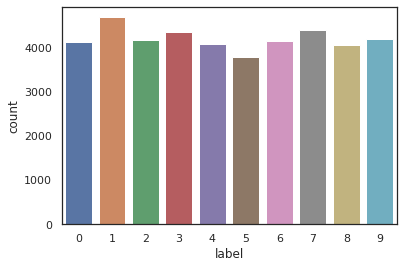

In [4]:
# データの可視化
y_train = train["label"]
x_train = train.drop(labels=["label"], axis=1) 

del train 

sns.countplot(y_train)
y_train.value_counts()

In [5]:
# x_trainの欠損値の確認
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
# testの欠損値の確認
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
# 正規化
x_train /= 255.0
test /= 255.0

In [8]:
# 28×28の行列へ変換
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [9]:
# ラベルをone-hotベクトルにエンコードする
y_train = to_categorical(y_train, num_classes=10)

In [10]:
# データを分割
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.1, 
                                                  random_state=42)

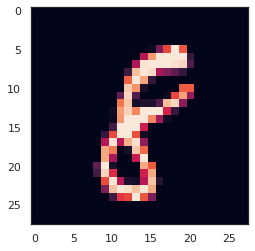

In [11]:
# 画像を可視化
plt.imshow(x_train[0][:,:,0])

In [12]:
# モデルの定義
# filters、kernel_sizeの数値の設定
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', 
                 activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', 
                 activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [13]:
# ADAMが使いやすい
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

In [14]:
model.compile(optimizer=optimizer, 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            factor=0.5,
                                            patience=3,  
                                            min_lr=0.00001)

In [16]:
# データの拡張
# 画像の内容をしっかり把握してからデータの拡張を行う
datagen = ImageDataGenerator(
        rotation_range=10,  # 範囲（度、0〜180）の画像をランダムに回転
        zoom_range = 0.1, # 画像をランダムにズーム 
        width_shift_range=0.1,  # 画像を水平方向にランダムにシフト
        height_shift_range=0.1,  # 画像をランダムに垂直方向にシフト
        horizontal_flip=False,  # 画像をランダムに反転
        vertical_flip=False)  # 画像をランダムに反転


datagen.fit(x_train)

In [17]:
model.fit_generator(datagen.flow(x_train,y_train, batch_size=86),
                    epochs = 30, validation_data = (x_val,y_val),
                    verbose = 2, steps_per_epoch=x_train.shape[0] // 86, 
                    callbacks=[learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
439/439 - 16s - loss: 0.4217 - accuracy: 0.8641 - val_loss: 0.0633 - val_accuracy: 0.9821
Epoch 2/30
439/439 - 15s - loss: 0.1309 - accuracy: 0.9616 - val_loss: 0.0412 - val_accuracy: 0.9895
Epoch 3/30
439/439 - 15s - loss: 0.0963 - accuracy: 0.9708 - val_loss: 0.0340 - val_accuracy: 0.9895
Epoch 4/30
439/439 - 15s - loss: 0.0758 - accuracy: 0.9770 - val_loss: 0.0410 - val_accuracy: 0.9898
Epoch 5/30
439/439 - 15s - loss: 0.0686 - accuracy: 0.9795 - val_loss: 0.0334 - val_accuracy: 0.9912
Epoch 6/30
439/439 - 15s - loss: 0.0665 - accuracy: 0.9809 - val_loss: 0.0412 - val_accuracy: 0.9883
Epoch 7/30
439/439 - 15s - loss: 0.0587 - accuracy: 0.9830 - val_loss: 0.0307 - val_accuracy: 0.9895
Epoch 8/30
439/439 - 15s - loss: 0.0623 - accuracy: 0.9819 - val_loss: 0.0338 - val_accuracy: 0.9905
Epoch 9/30
439/439 - 15s - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0233 - val_accuracy: 0.9929
Epoch 10/30
439

In [18]:
results = model.predict(test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name="Label")

In [19]:
submission = pd.concat([pd.Series(range(1,28001), name ="ImageId"), results], axis=1)
submission.to_csv("cnn_mnist.csv",index=False)